# 简单分析数据

# 读取数据

In [386]:
import pandas as pd
df = pd.read_csv(u'E:/2017毕业/STUDY/2014yan/MLmine/PythonML/Fang_Scrapy/Fang_Scrapy/HousePrice/showInfo.csv', sep=',')

# 预处理数据

In [387]:
#去掉没有标明价格的楼盘
usefull=df[df.price != '待定']
usefull = usefull.drop_duplicates(['name'])

In [388]:
# usefull

In [389]:
#将数据类型转换为float；也可以在代码 中更改
usefull[['price']] = usefull[['price']].astype(float)

In [390]:
type(usefull.ix[0].price)

numpy.float64

In [391]:
usefull = usefull[ usefull.price > 1000]

# 普通住宅新房数量

In [392]:
fzCount = usefull.groupby('region').count()[['name']]

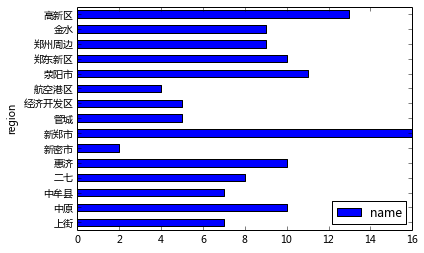

In [393]:
fzCount.plot(kind='barh')

In [394]:
# usefull

# 显示楼盘均价

In [395]:
avgPrice = usefull.groupby('region').price.mean()

In [396]:
%matplotlib inline 

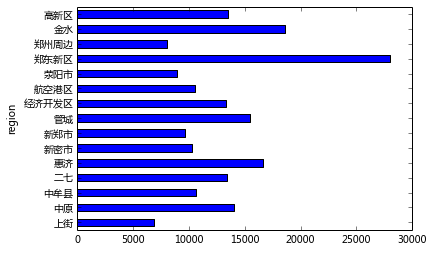

In [397]:
avgPrice.plot(kind='barh',rot=0)

# 求每个区的每个户型的平均面积

In [398]:
house = usefull[['region','name','one','two','three','four','five']]

In [399]:
area_sums = house.groupby('region')['name','region','one','two','three','four','five'].sum()

In [400]:
area_sums

,one,two,three,four,five
region,,,,,
上街,122.40,435.99,754.92,335.54,0
中原,327.57,708.48,1060.50,271.00,0
中牟县,56.20,245.34,699.64,315.32,0
二七,105.42,492.91,778.59,702.36,0
惠济,0.00,406.60,977.32,1251.83,0
新密市,0.00,86.75,268.75,298.74,0
新郑市,0.00,1108.30,1855.44,1154.16,0
管城,0.00,472.48,566.32,263.60,0
经济开发区,57.50,263.70,552.85,475.00,0


In [401]:
def funcSign(test):
    for key in ['one','two','three','four','five']:
        test[key] = np.sign(test[key])
    return test

In [402]:
typeCount=funcSign(house)

d:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [403]:
typeCount = typeCount.groupby('region').sum()

In [404]:
typeCount

,one,two,three,four,five
region,,,,,
上街,3.0,5.0,6.0,2.0,0
中原,6.0,9.0,10.0,2.0,0
中牟县,1.0,3.0,6.0,2.0,0
二七,2.0,6.0,7.0,5.0,0
惠济,0.0,5.0,8.0,9.0,0
新密市,0.0,1.0,2.0,2.0,0
新郑市,0.0,13.0,16.0,8.0,0
管城,0.0,5.0,5.0,2.0,0
经济开发区,1.0,3.0,5.0,3.0,0


In [405]:
#每个户型的平均面积；按照不同区计算
avgAreaOftype = area_sums/typeCount

In [406]:
avgAreaOftype = avgAreaOftype.fillna(0)

In [407]:
avgAreaOftype

,one,two,three,four,five
region,,,,,
上街,40.800,87.198000,125.820000,167.770000,0.0
中原,54.595,78.720000,106.050000,135.500000,0.0
中牟县,56.200,81.780000,116.606667,157.660000,0.0
二七,52.710,82.151667,111.227143,140.472000,0.0
惠济,0.000,81.320000,122.165000,139.092222,0.0
新密市,0.000,86.750000,134.375000,149.370000,0.0
新郑市,0.000,85.253846,115.965000,144.270000,0.0
管城,0.000,94.496000,113.264000,131.800000,0.0
经济开发区,57.500,87.900000,110.570000,158.333333,0.0


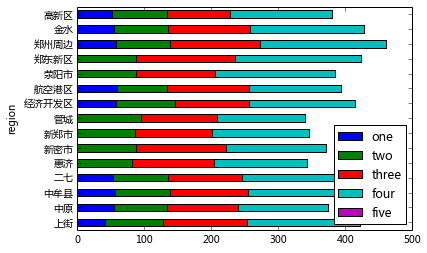

In [408]:
avgAreaOftype.plot(kind='barh',stacked=True)

In [409]:
from pandas import DataFrame, Series
price=DataFrame(avgPrice)

In [410]:
price['price']

region
上街        6842.857143
中原       14040.000000
中牟县      10614.285714
二七       13400.000000
惠济       16660.000000
新密市      10300.000000
新郑市       9668.750000
管城       15440.000000
经济开发区    13320.000000
航空港区     10525.000000
荥阳市       8959.090909
郑东新区     28010.000000
郑州周边      8064.444444
金水       18622.222222
高新区      13523.076923
Name: price, dtype: float64

In [411]:
type(usefull.ix[0].price)

numpy.float64

# 每个楼盘的每个户型的总价


In [412]:
def computes(test):
    
    for key in ['one','two','three','four','five']:
        total = key + 's'
        print total
        test[total] = test.price.mul(test[key])
    return test

In [413]:
totolPrice = computes(usefull)

ones
twos
threes
fours
fives


In [414]:
totolPrice

,name,region,status,lvhua,rjl,price,one,two,three,four,...,lng,lat,tranTime,tranDistancec,tranName,ones,twos,threes,fours,fives
0,润丰新尚,新郑市,在售,待定,待定,7600.0,0.00,84.33,119.00,107.00,...,113.873071,34.569617,8017,57325,"城郊线,地铁2号线,地铁1号线",0.0,640908.0,904400.0,813200.0,0.0
1,锦艺金水湾,金水,在售,待定,待定,15800.0,0.00,0.00,105.15,142.31,...,113.698023,34.839169,5219,28858,"地铁2号线,地铁1号线",0.0,0.0,1661370.0,2248498.0,0.0
2,世豫西西里传说,郑州周边,在售,待定,待定,8300.0,0.00,0.00,138.54,186.05,...,113.649644,34.756610,2711,15992,地铁1号线,0.0,0.0,1149882.0,1544215.0,0.0
3,泰宏建业国际城,二七,在售,待定,待定,13000.0,0.00,78.80,112.20,137.69,...,110.288202,21.606210,97672,22169,K158,0.0,1024400.0,1458600.0,1789970.0,0.0
11,华润悦府,金水,在售,待定,待定,18000.0,0.00,86.50,140.93,227.45,...,113.662864,34.766740,3952,19558,地铁1号线,0.0,1557000.0,2536740.0,4094100.0,0.0
12,汉飞壹号华府,荥阳市,在售,40.2,待定,6500.0,0.00,86.00,110.50,0.00,...,113.422007,34.794922,6299,13226,182路,0.0,559000.0,718250.0,0.0,0.0
13,光明索河湾,荥阳市,在售,40.1,待定,7200.0,0.00,0.00,121.08,164.61,...,113.383844,34.800267,11544,43456,"12路,地铁1号线",0.0,0.0,871776.0,1185192.0,0.0
15,恒大金碧天下,郑州周边,在售,待定,待定,8500.0,0.00,84.00,134.88,192.75,...,113.649644,34.756610,2711,15992,地铁1号线,0.0,714000.0,1146480.0,1638375.0,0.0
16,恒大御景湾,郑州周边,在售,待定,待定,8300.0,0.00,79.84,120.80,239.35,...,116.430079,37.156618,33688,81464,G1272,0.0,662672.0,1002640.0,1986605.0,0.0
17,郑开恒大未来城,郑州周边,在售,待定,待定,9700.0,0.00,0.00,0.00,0.00,...,113.959426,34.787548,8017,48078,"郑汴城际公交101路,地铁1号线",0.0,0.0,0.0,0.0,0.0


In [415]:
totolPrice = totolPrice.sort_values(axis=0, by=['twos','tranTime'],ascending=False)
# mean_ratings.sort_values(axis=0,by='F',ascending=False)[:10] #为何这个不可以实现a????

# 某个户型总价：按照总价在按照交通时间排序
f[f.twot < 1200000][['name','tranTime','region','price','two','twot']][:10]

In [416]:
totolPrice[['region','name','tranTime','twos']]

,region,name,tranTime,twos
341,金水,东润泰和,4401,2320920.0
203,管城,正商中州城,4783,1997380.0
38,郑东新区,未来华庭,5407,1758200.0
81,高新区,五龙新城,3375,1707170.0
200,管城,阳光城,5371,1653000.0
210,郑东新区,泰宏阳光和苑,5407,1644244.0
356,新郑市,郑州国瑞城,未知,1573020.0
11,金水,华润悦府,3952,1557000.0
80,金水,亚新美好城邦,4320,1507750.0
63,金水,物华国际,4320,1472216.0


# 按照交通时间范围 找楼盘

In [417]:
f = usefull[usefull.tranTime != '未知']


In [418]:
f[f.region == '郑东新区']

,name,region,status,lvhua,rjl,price,one,two,three,four,...,lng,lat,tranTime,tranDistancec,tranName,ones,twos,threes,fours,fives
38,未来华庭,郑东新区,在售,30.24,待定,20000.0,0.0,87.91,123.44,0.00,...,113.794340,34.771862,5407,31010,地铁1号线,0.0,1758200.0,2468800.0,0.0,0.0
84,恒大悦龙台,郑东新区,在售,36.8,待定,32000.0,0.0,0.00,139.00,171.18,...,116.759347,23.408849,81006,95943,"D671,G280",0.0,0.0,4448000.0,5477760.0,0.0
93,正商善水上境,郑东新区,在售,待定,待定,30000.0,0.0,0.00,189.40,191.62,...,113.791618,34.786704,5855,32276,"299路,地铁1号线",0.0,0.0,5682000.0,5748600.0,0.0
124,悦湖会,郑东新区,在售,待定,待定,11000.0,0.0,87.70,115.84,169.97,...,114.010339,34.734078,15106,65025,"郑汴城际公交101路,郑汴城际公交101路,地铁1号线",0.0,964700.0,1274240.0,1869670.0,0.0
132,伟业龙湖上城,郑东新区,在售,待定,待定,17000.0,0.0,0.00,122.00,0.00,...,113.749597,34.851662,7237,37352,"131路,地铁2号线,地铁1号线",0.0,0.0,2074000.0,0.0,0.0
157,金领九如意,郑东新区,在售,待定,待定,43000.0,0.0,0.00,201.13,246.96,...,110.288202,21.612931,97375,21797,K158,0.0,0.0,8648590.0,10619280.0,0.0
168,建业天筑,郑东新区,在售,待定,待定,41000.0,0.0,0.00,158.00,234.00,...,113.771358,34.759706,5229,30790,地铁1号线,0.0,0.0,6478000.0,9594000.0,0.0
185,润城时光里,郑东新区,在售,待定,待定,16500.0,0.0,88.90,127.42,134.00,...,103.771994,35.992495,62472,40763,Z266,0.0,1466850.0,2102430.0,2211000.0,0.0
206,瀚海晴宇,郑东新区,在售,待定,待定,50000.0,0.0,0.00,183.67,0.00,...,113.794340,34.771862,5407,31010,地铁1号线,0.0,0.0,9183500.0,0.0,0.0
210,泰宏阳光和苑,郑东新区,在售,30.1,待定,19600.0,0.0,83.89,128.10,165.77,...,113.794340,34.771862,5407,31010,地铁1号线,0.0,1644244.0,2510760.0,3249092.0,0.0


In [419]:
f[['tranTime']] = f[['tranTime']].astype(int)

In [420]:
#下面根据交通时间（单位为s）分类；以大于一小时为far;小于半小时为close;
f['dis'] = map(lambda x: 'far' if x>=3600 else ('mid' if (x<3600 and x>=1800) else 'close' ) , f['tranTime'])
# df['涨跌'] = map(lambda x: '涨' if x>0 else ('跌' if x<0 else '平' ) , df['p_change'])

d:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [421]:
# f.dis

# 按照距离远近 统计房源数量

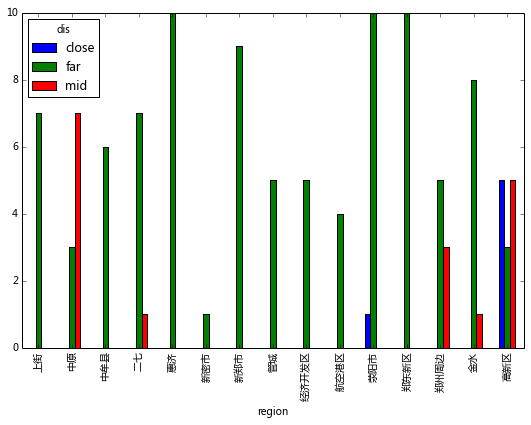

In [422]:
# axes = plt.subplots(1, 1, figsize=(10, 8))
f.groupby(['region','dis']).region.count().unstack('dis').plot(kind='bar',figsize=(9, 6))